In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Read Data

In [ ]:
df1 = pd.read_csv('car_data.csv')
df2 = pd.read_csv('model_data.csv')

In [ ]:
df1.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12-09-2021,4.4
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,01-12-2020,4.8
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.3
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11-08-2021,4.3


In [ ]:
len(df1)

2237

In [ ]:
df2.head()

,Model,Current Price
0,HyundaiElitei20Sportz(O)1.4CRDi,Rs.7.69 Lakh
1,MarutiErtigaZXISMARTHYBRID,Rs.9.27 Lakh
2,MarutiVitaraBrezzaLDI,"Rs.7,62,742"
3,FordEcosport1.5TITANIUMTIVCT,Rs.7.64 Lakh
4,HyundaiVernaFLUIDIC1.4CRDI,"Rs.9,99,900"


In [ ]:
len(df2)

434

Merge 2 tables as one dataset by column 'Model'

In [ ]:
df=df1.merge(df2,left_on='Model', right_on='Model')

In [ ]:
df.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2,Rs.4.65 Lakh
1,MarutiWagonR1.0LXI,242499,88514,2015,Second Owner,Petrol + CNG,MANUAL,26-07-2021,4.4,Rs.4.65 Lakh
2,MarutiWagonR1.0LXI,381699,29735,2017,Second Owner,Petrol + CNG,MANUAL,18-09-2021,4.3,Rs.4.65 Lakh
3,MarutiWagonR1.0LXI,181999,153709,2013,First Owner,Petrol + CNG,MANUAL,25-05-2021,4.1,Rs.4.65 Lakh
4,MarutiWagonR1.0LXI,239499,88691,2012,Second Owner,Petrol + CNG,MANUAL,15-10-2021,4.4,Rs.4.65 Lakh


In [ ]:
len(df)

2237

In [ ]:
!pip3 install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date
t = date.today()
t_date=t.strftime("%d-%m-%Y")
y = t.strftime("%Y")

# Data Cleaning

#Find how many year old

In [ ]:
df['car_old']=df['Year'].apply(lambda x: int(y)-x)

Create price column from Current price column

In [ ]:
price=[]
rep=['Lakh','Lakhs','Rs.',',']
for i in df['Current Price']:
    if type(i) is str:
        for j in rep:
            i=i.replace(j,'')
        price.append(float(i))
    elif type(i) is float:
        price.append(i)
    
df['Price']=price      
df=df[df['Price']!=0]

In [ ]:
price=[]
for i in df['Price']:
    #print (i)
    if i//10 <= 100.0:
        price.append(round(i*100000,2))
    else:
        price.append(round(i,2))
    
df['Price']=price      


Update Insurance column

In [ ]:
insu =[]
for i in df['Insurance']:
    if (i=='Insurance Expired') | (i=='Expired'):
        insu.append('Expired')
    elif str(i) <t_date:
        insu.append('Expired')
    elif str(i) >=t_date:
        insu.append('Current')
    else:
        insu.append(i)
df['Insurance_status']=insu
df=df.drop('Insurance',axis=1)
df=df.drop('Current Price',axis=1)

In [ ]:
import re
df['company']=df['Model'].apply(lambda x: re.findall(r"[A-Z][^A-Z]*",x)[0])

df['company']=df['company'].apply(lambda x: 'Hyundai' if x =='Hyundaii20' else x)
df['company']=df['company'].apply(lambda x: 'Hyundai' if x =='Hyundaii10' else x)
df['company']=df['company'].apply(lambda x: 'BMW' if x is 'B' else x)
df['company']=df['company'].apply(lambda x: 'MGHECTORSHARPDCT' if x is 'M' else x)

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-17-1589fa587722>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  df['company']=df['company'].apply(lambda x: 'BMW' if x is 'B' else x)
<ipython-input-17-1589fa587722>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  df['company']=df['company'].apply(lambda x: 'MGHECTORSHARPDCT' if x is 'M' else x)


In [ ]:
df.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Car Condition,car_old,Price,Insurance_status,company
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,4.2,8,465000.0,Expired,Maruti
1,MarutiWagonR1.0LXI,242499,88514,2015,Second Owner,Petrol + CNG,MANUAL,4.4,7,465000.0,Expired,Maruti
2,MarutiWagonR1.0LXI,381699,29735,2017,Second Owner,Petrol + CNG,MANUAL,4.3,5,465000.0,Expired,Maruti
3,MarutiWagonR1.0LXI,181999,153709,2013,First Owner,Petrol + CNG,MANUAL,4.1,9,465000.0,Expired,Maruti
4,MarutiWagonR1.0LXI,239499,88691,2012,Second Owner,Petrol + CNG,MANUAL,4.4,10,465000.0,Expired,Maruti


In [ ]:
df['Insurance']=df['Insurance_status'].apply(lambda x: 1 if x=='Current' else 0)

In [ ]:
df.drop(labels=['Year'], axis=1, inplace=True)
df.drop('Insurance_status', axis=1,inplace=True)

In [ ]:
df.head()

,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Car Condition,car_old,Price,company,Insurance
0,MarutiWagonR1.0LXI,312165,82238,First Owner,Petrol + CNG,MANUAL,4.2,8,465000.0,Maruti,0
1,MarutiWagonR1.0LXI,242499,88514,Second Owner,Petrol + CNG,MANUAL,4.4,7,465000.0,Maruti,0
2,MarutiWagonR1.0LXI,381699,29735,Second Owner,Petrol + CNG,MANUAL,4.3,5,465000.0,Maruti,0
3,MarutiWagonR1.0LXI,181999,153709,First Owner,Petrol + CNG,MANUAL,4.1,9,465000.0,Maruti,0
4,MarutiWagonR1.0LXI,239499,88691,Second Owner,Petrol + CNG,MANUAL,4.4,10,465000.0,Maruti,0


In [ ]:
df['Transmission'].value_counts()

MANUAL       1883
AUTOMATIC     168
MH02            9
HR26            9
DL4C            8
MH12            8
KA05            7
MH04            6
DL12            6
MH03            6
KA01            5
MH01            5
HR51            4
KA51            4
DL3C            4
KA03            4
MH47            4
MH43            4
DL5C            4
KA50            4
RJ14            3
TS07            3
DL8C            3
KA04            3
KA53            3
GJ27            3
MH14            2
DL2C            2
MH05            2
UP32            2
UP14            2
KA02            2
TS08            2
HR03            1
GJ05            1
GJ01            1
PB10            1
HR05            1
UP78            1
GJ06            1
Ch01            1
HR12            1
DL1C            1
DL14            1
GJ18            1
HR29            1
DL10            1
TS09            1
TN12            1
PB91            1
DL11            1
MH46            1
TN02            1
TN22            1
DL9C            1
RJ45      

Transmission columns consist of junk values other than Automatic or Manual Tansmission. lets us replace the Junk values with "MANUAL" assuming the cars are Manual Tansmission. 
1. Automatic -- 1
2. Manual --0

In [ ]:
df['Transmission']=df['Transmission'].apply(lambda x: 1 if x=='AUTOMATIC' else 0)

In [ ]:
df['Fuel Type'].value_counts()

Petrol          1372
Diesel           670
Petrol + CNG     158
Petrol + LPG       9
Name: Fuel Type, dtype: int64

In [ ]:
#since the CNG & LPG are less consuming fueal type, i hope we can consider the Pertol+CNG & Petrol+LPG as pertol vechile
#Diesel -- 1
#Petrol -- 0

df['Fuel Type']=df['Fuel Type'].apply(lambda x: 1 if x=='Diesel' else 0)

In [ ]:
df.head()

,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Car Condition,car_old,Price,company,Insurance
0,MarutiWagonR1.0LXI,312165,82238,First Owner,0,0,4.2,8,465000.0,Maruti,0
1,MarutiWagonR1.0LXI,242499,88514,Second Owner,0,0,4.4,7,465000.0,Maruti,1
2,MarutiWagonR1.0LXI,381699,29735,Second Owner,0,0,4.3,5,465000.0,Maruti,1
3,MarutiWagonR1.0LXI,181999,153709,First Owner,0,0,4.1,9,465000.0,Maruti,1
4,MarutiWagonR1.0LXI,239499,88691,Second Owner,0,0,4.4,10,465000.0,Maruti,1


In [ ]:
df.dropna(axis=0, inplace=True)

# Explore the Target feature

In [ ]:
df.corr()['Selling Price'].sort_values()

car_old             -0.569687
Kilometers Driven   -0.173299
Insurance            0.180947
Transmission         0.245417
Fuel Type            0.356728
Car Condition        0.439386
Price                0.508317
Selling Price        1.000000
Name: Selling Price, dtype: float64

In [ ]:
fig = px.scatter_3d(df, x='Selling Price', y='Car Condition', z='Price', color='Selling Price')
fig.show()

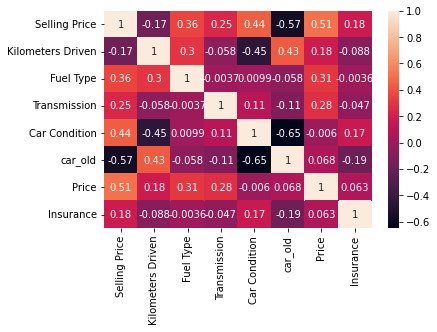

In [ ]:
sns.heatmap(df.corr(), annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



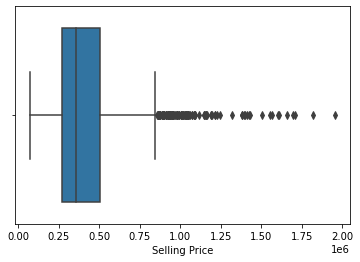

In [ ]:
sns.boxplot(df['Selling Price'])

In [ ]:
df.head()

,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Car Condition,car_old,Price,company,Insurance
0,MarutiWagonR1.0LXI,312165,82238,First Owner,0,0,4.2,8,465000.0,Maruti,0
1,MarutiWagonR1.0LXI,242499,88514,Second Owner,0,0,4.4,7,465000.0,Maruti,0
2,MarutiWagonR1.0LXI,381699,29735,Second Owner,0,0,4.3,5,465000.0,Maruti,0
3,MarutiWagonR1.0LXI,181999,153709,First Owner,0,0,4.1,9,465000.0,Maruti,0
4,MarutiWagonR1.0LXI,239499,88691,Second Owner,0,0,4.4,10,465000.0,Maruti,0


In [ ]:
num=['Selling Price','Kilometers Driven','Car Condition','car_old','Price']

In [ ]:
from scipy import stats
z_score = np.abs(stats.zscore(df[num]))
filtered = (z_score <2).all(axis=1)
df=df[filtered]

In [ ]:
df.shape

(1940, 11)

# Train Test Split

In [ ]:
X=df.drop('Selling Price', axis=1)
y=df['Selling Price']
cat=X.select_dtypes(include='object').columns
num=X.select_dtypes(exclude='object').columns

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state=42, shuffle=True)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
col_transfer = ColumnTransformer([('cat_col',OneHotEncoder(sparse=False),cat),('num_col',StandardScaler(),num)], remainder='passthrough')

# Column Transfer

In [ ]:
col_transfer.fit(X)
X_train=col_transfer.transform(X_train)
X_test = col_transfer.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)


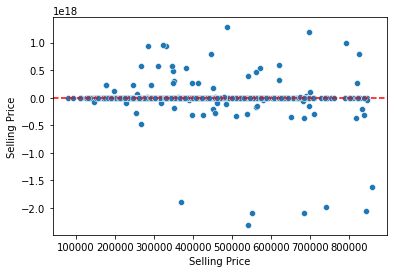

In [ ]:
test_residual = y_test - pred
sns.scatterplot(x=y_test, y=test_residual)
plt.axhline(y=0,color='r',ls='--')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



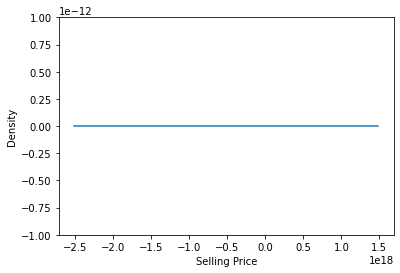

In [ ]:
sns.distplot(test_residual)

In [ ]:
from sklearn.linear_model import ElasticNet,Lasso,Ridge, SGDRegressor, LinearRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

model = [ElasticNet(),Lasso(),Ridge(), SGDRegressor(), SVR(), RandomForestRegressor(), AdaBoostRegressor()]
for i in model[0:4]:
    gride = GridSearchCV(estimator=i, cv=10, param_grid={'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,1.10, 10,100]}, scoring='r2')
    gride.fit(X_train, y_train)
    pred = gride.predict(X_test)
    print("Regression: {}\n".format(i))
    print("Best Score: {}\n".format(np.round(gride.best_score_,2)*100))
    print("Best Param: {}\n".format(gride.best_params_,2))
    print("R2 score from Predict: {}".format(np.round(r2_score(y_test, pred),2)))
    

Regression: ElasticNet()

Best Score: 83.0

Best Param: {'alpha': 0.001}

R2 score from Predict: 0.83
Regression: Lasso()

Best Score: 82.0

Best Param: {'alpha': 10}

R2 score from Predict: 0.83
Regression: Ridge()

Best Score: 82.0

Best Param: {'alpha': 1}

R2 score from Predict: 0.83
Regression: SGDRegressor()

Best Score: 82.0

Best Param: {'alpha': 1e-05}

R2 score from Predict: 0.82


In [ ]:
from sklearn.model_selection import cross_val_score
def get_valdiation(model):
    cv=cross_val_score(model,X_train,y_train,cv=10)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print("Regression: {} \n".format(model))
    print("Score: {:.2f} %".format(np.mean(cv)*100))
    print("Standard deviation: {:.2f}".format(np.std(cv)))
    print("R2 score from Predict: {} \n\n".format(np.round(r2_score(y_test, pred),2)))
    test_residual = y_test - pred
    sns.scatterplot(x=y_test, y=test_residual)
    plt.axhline(y=0,color='r',ls='--')
    plt.title("Regressor : {}".format(model))
    plt.show()
    sns.distplot(test_residual)
    plt.show()

Regression: ElasticNet(alpha=0.001) 

Score: 82.50 %
Standard deviation: 0.03
R2 score from Predict: 0.83 




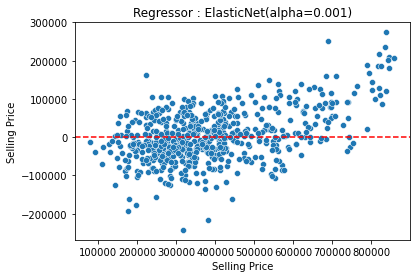

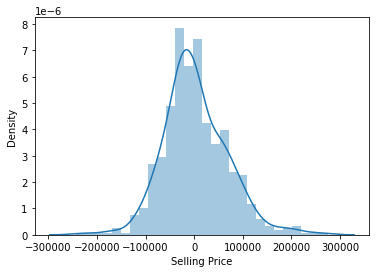

Regression: Lasso(alpha=10) 

Score: 81.93 %
Standard deviation: 0.03
R2 score from Predict: 0.83 




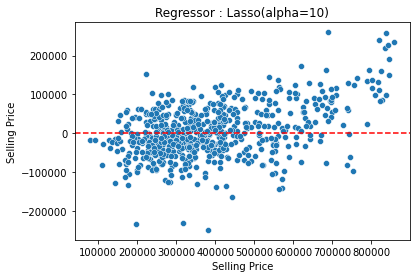

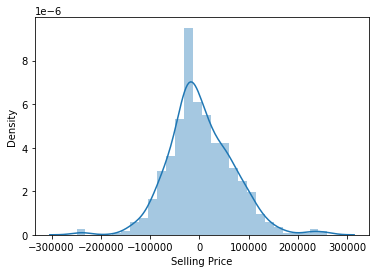

Regression: Ridge(alpha=1) 

Score: 82.33 %
Standard deviation: 0.03
R2 score from Predict: 0.83 




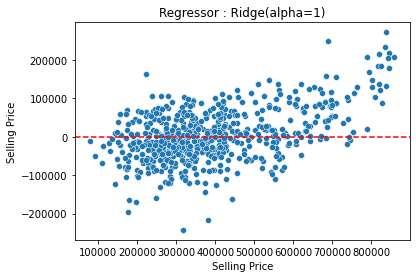

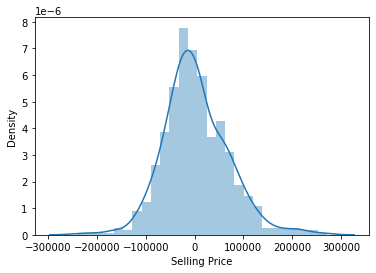

Regression: SGDRegressor() 

Score: 81.75 %
Standard deviation: 0.03
R2 score from Predict: 0.82 




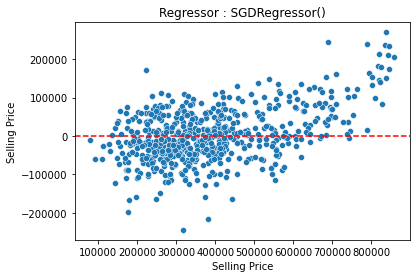

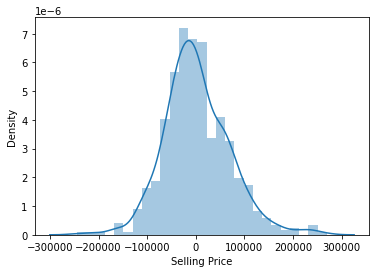

Regression: RandomForestRegressor() 

Score: 85.08 %
Standard deviation: 0.02
R2 score from Predict: 0.82 




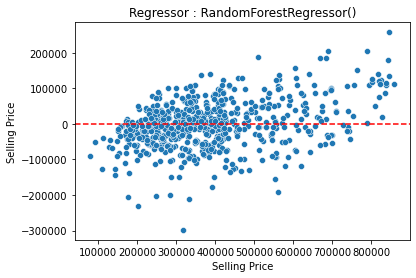

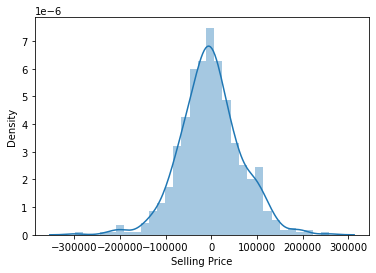

Regression: AdaBoostRegressor() 

Score: 79.03 %
Standard deviation: 0.03
R2 score from Predict: 0.77 




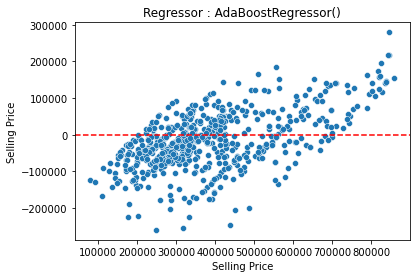

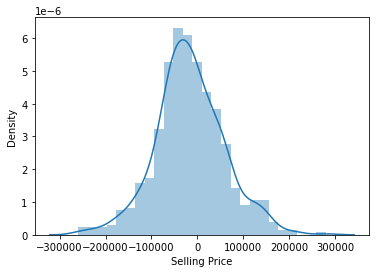

Regression: LinearRegression() 

Score: -85966444333985647005007872.00 %
Standard deviation: 1161653219304811219910656.00
R2 score from Predict: -1.3030571464259992e+19 




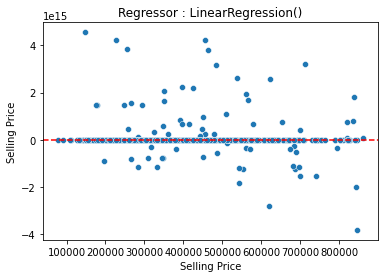

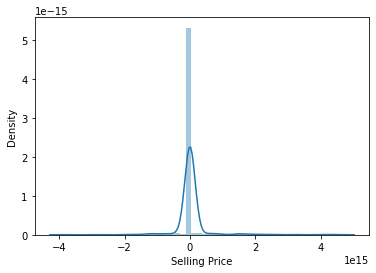

In [ ]:
model = [ElasticNet(alpha=0.001),Lasso(alpha=10),Ridge(alpha=1), SGDRegressor(), RandomForestRegressor(), AdaBoostRegressor(), LinearRegression()]
for i in model:
    get_valdiation(i)

# Conclusion: 
RandomForest Regressor works well for this problem with 85% accuracy